In [1]:
# Task 1
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.3.0


In [2]:
# Task 2
(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words = 10000,test_split = 0.2)

In [3]:
print(len(x_train))

8982


In [4]:
print(len(x_test))

2246


In [5]:
num_classes = np.max(y_train) + 1
print(num_classes)

46


In [6]:
# Task 3
tokenizer  = Tokenizer(num_words=10000)

In [7]:
x_train = tokenizer.sequences_to_matrix(x_train,mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test,mode='binary')

In [8]:
x_train.shape

(8982, 10000)

In [9]:
# convert class vectors into categorical matrix
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

In [10]:
y_train.shape

(8982, 46)

In [11]:
# Task 4
model = Sequential([
    Dense(512,input_shape=(10000,)),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Task 5
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=3, verbose=1, mode='min', baseline=None, restore_best_weights=False)
callbacks = [early_stopping]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics =['accuracy'])

In [16]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.1,callbacks=callbacks)

Epoch 1/100
253/253 [==============================] - 6s 24ms/step - loss: 1.2856 - accuracy: 0.7231 - val_loss: 0.9497 - val_accuracy: 0.7964
Epoch 2/100
253/253 [==============================] - 6s 23ms/step - loss: 0.4856 - accuracy: 0.8900 - val_loss: 0.8451 - val_accuracy: 0.8109
Epoch 3/100
253/253 [==============================] - 6s 23ms/step - loss: 0.2750 - accuracy: 0.9370 - val_loss: 0.9047 - val_accuracy: 0.8053
Epoch 4/100
253/253 [==============================] - 6s 24ms/step - loss: 0.2254 - accuracy: 0.9466 - val_loss: 0.9474 - val_accuracy: 0.8120
Epoch 5/100
253/253 [==============================] - 6s 23ms/step - loss: 0.1967 - accuracy: 0.9534 - val_loss: 0.9316 - val_accuracy: 0.8187
Epoch 00005: early stopping


In [17]:
model.evaluate(x_test,y_test,batch_size=32,verbose=1)

71/71 [==============================] - 1s 7ms/step - loss: 0.9255 - accuracy: 0.8090


[0.9254916906356812, 0.8089937567710876]

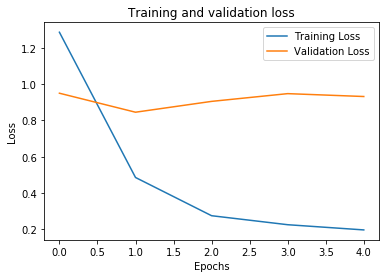

In [18]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()